## 1. Downloading and Reading data

### 1.1 Download from Drive and unzip

In [ ]:
!mkdir digit-recognizer
!unzip drive/MyDrive/digit-recognizer.zip -d digit-recognizer

mkdir: cannot create directory ‘digit-recognizer’: File exists
Archive:  drive/MyDrive/digit-recognizer.zip
replace digit-recognizer/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### 1.2 Read train and test dataframes

In [ ]:
import pandas as pd

train_df = pd.read_csv('digit-recognizer/train.csv')

train_df[:5]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df = pd.read_csv('digit-recognizer/test.csv')

test_df[:5]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Make X and y datasets

### 2.1 Put labels and image data into dataset

In [ ]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [ ]:
X_train = df.drop(columns=['label'])
y_train = df['label']
X_test = test_df

### 2.2 Normalize X datasets

In [ ]:
X_train /= 255.
X_test /= 255.
print(X_train.head())
print(X_test.head())

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel780  pixel781  pixel782  pixel783  
0       0.0       0.0   

### 2.3 Reshape X datasets
The Pictures are 784 pixels total which is 28*28.
Reshape X_train and X_test to 28x28

In [ ]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

### 2.4 One hot encode y
There are 10 different digits, so the number of classes will be 10

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)

### 2.5 Split training data to training and validation data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.1, random_state=42, shuffle=True)

print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))

37800
37800
4200
4200


## 3. Visualize data

### 3.1 Plot random images with labels

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np

def plot_n_random_images(n=5):

  """
  Plots n random images with labels as titles
  """

  fig = plt.figure(figsize=(10, 7))

  for i in range(1,n+1):
    rand_id = random.randint(0, 4200-1)

    img = X_train[rand_id][:, :, 0]
    label = y_train[rand_id]

    fig.add_subplot(1,5,i)
    plt.imshow(img)
    plt.axis(False)
    plt.title(f"Answer: {np.where(y_train[rand_id] == 1)[0]}")

  plt.show()

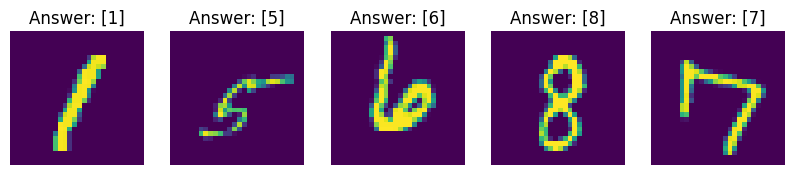

In [ ]:
plot_n_random_images()

## 4. Preprocess Images

### 4.1 Create Augmentation Datagen

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=10, # shouldn't be too high because it could change a number
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.1)

### 4.2 Fit Training Data to Datagen

In [ ]:
datagen.fit(X_train)

### 4.3 Create and Batch Training and Validation Datasets

In [ ]:
batch_size = 64
train_data = datagen.flow(X_train, y_train, batch_size=batch_size)
val_data = (X_val, y_val)

## 5. Build and train the model

### 5.1 Build and train the base model (Basic CNN)

#### 5.1.1 Build the base model

In [ ]:
num_classes = 10

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers

# create
model_0 = Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# compile
model_0.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

# get summary
model_0.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 5408)              0         
                                                                 
 dense_20 (Dense)            (None, 64)                346176    
                                                                 
 dense_21 (Dense)            (None, 10)                650       
                                                                 
Total params: 347146 (1.32 MB)
Trainable params: 347146 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

#### 5.1.2 Fit Data to Base Model

In [ ]:
# fit

history_0 = model_0.fit(train_data,
                        epochs=10,
                        validation_data=val_data,
                        validation_steps=0.5 * len(val_data))

Epoch 1/10
591/591 [==============================] - 17s 26ms/step - loss: 0.5532 - accuracy: 0.8269 - val_loss: 0.1406 - val_accuracy: 0.9605
Epoch 2/10
591/591 [==============================] - 14s 24ms/step - loss: 0.2040 - accuracy: 0.9390 - val_loss: 0.0905 - val_accuracy: 0.9712
Epoch 3/10
591/591 [==============================] - 15s 25ms/step - loss: 0.1589 - accuracy: 0.9514 - val_loss: 0.0794 - val_accuracy: 0.9743
Epoch 4/10
591/591 [==============================] - 15s 25ms/step - loss: 0.1379 - accuracy: 0.9582 - val_loss: 0.0878 - val_accuracy: 0.9717
Epoch 5/10
591/591 [==============================] - 15s 25ms/step - loss: 0.1242 - accuracy: 0.9621 - val_loss: 0.0649 - val_accuracy: 0.9802
Epoch 6/10
591/591 [==============================] - 14s 24ms/step - loss: 0.1088 - accuracy: 0.9672 - val_loss: 0.0755 - val_accuracy: 0.9779
Epoch 7/10
591/591 [==============================] - 16s 26ms/step - loss: 0.1011 - accuracy: 0.9685 - val_loss: 0.0681 - val_accuracy:

#### 5.1.2 Plot Loss Curves of the Base Model

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # plot loss
  plt.plot(epochs,loss,label='train_loss')
  plt.plot(epochs,val_loss,label='test_loss')
  plt.title('Losses')
  plt.xlabel('Epochs')
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='train_acc')
  plt.plot(epochs, val_accuracy, label='val_acc')
  plt.xlabel('Epochs')
  plt.title('Accuracy')
  plt.legend

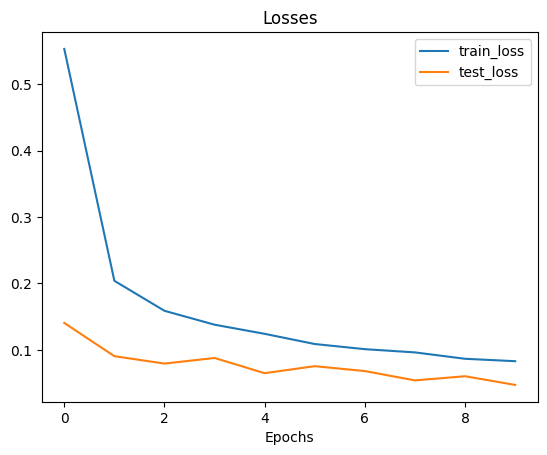

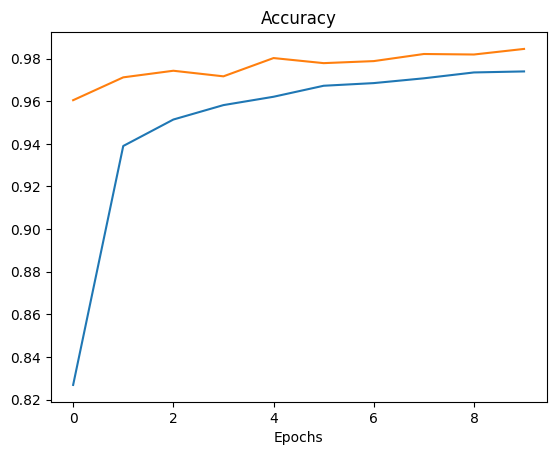

In [ ]:
plot_loss_curves(history_0)

### 5.2 CNN model with Dropout, Batch Normalization and Callbacks

#### 5.2.1 EarlyStopping callback

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=4)

#### 5.2.2 ReduceLrOnPlateu Callback

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2,
                                                 patience=2,
                                                 verbose=1,
                                                 min_lr=1e-7)

#### 5.2.3 Build the model

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers

# create
model_1 = Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(28,28,1)),
    layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(),
    layers.Dropout(0.15),
    layers.BatchNormalization(),

    layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(),
    layers.Dropout(0.15),
    layers.BatchNormalization(),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.15),
    layers.BatchNormalization(),

    layers.Dense(10, activation='softmax')
])

# compile
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

# get summary
model_1.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_36 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_33 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 batch_normalization_33 (Ba  (None, 14, 14, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_37 (Conv2D)          (None, 14, 14, 32)      

#### 5.2.4 Fit the model

In [ ]:
history_1 = model_1.fit(train_data,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=val_data,
                        validation_steps=len(val_data),
                        callbacks=[early_stopping, reduce_lr])

Epoch 1/50
591/591 [==============================] - 21s 28ms/step - loss: 0.4182 - accuracy: 0.8727 - val_loss: 0.3772 - val_accuracy: 0.8760 - lr: 0.0010
Epoch 2/50
591/591 [==============================] - 16s 27ms/step - loss: 0.1374 - accuracy: 0.9592 - val_loss: 0.0583 - val_accuracy: 0.9810 - lr: 0.0010
Epoch 3/50
591/591 [==============================] - 17s 30ms/step - loss: 0.1031 - accuracy: 0.9691 - val_loss: 0.0616 - val_accuracy: 0.9824 - lr: 0.0010
Epoch 4/50
591/591 [==============================] - 16s 28ms/step - loss: 0.0904 - accuracy: 0.9729 - val_loss: 0.0352 - val_accuracy: 0.9883 - lr: 0.0010
Epoch 5/50
591/591 [==============================] - 20s 33ms/step - loss: 0.0828 - accuracy: 0.9755 - val_loss: 0.0393 - val_accuracy: 0.9893 - lr: 0.0010
Epoch 6/50
591/591 [==============================] - 16s 27ms/step - loss: 0.0697 - accuracy: 0.9788 - val_loss: 0.0345 - val_accuracy: 0.9883 - lr: 0.0010
Epoch 7/50
591/591 [==============================] - 20s 

#### 5.2.5 Plot Loss Curves

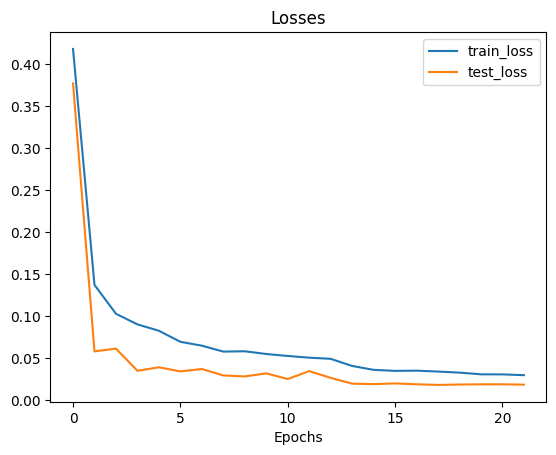

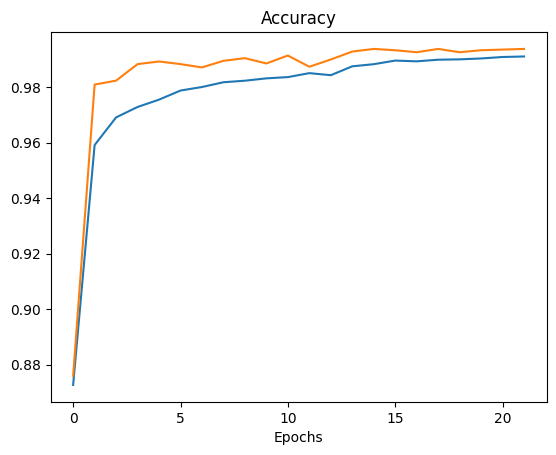

In [ ]:
plot_loss_curves(history_1)

### 5.3 More Layers and Denser CNN Model

#### 5.3.1 Build the Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers

tf.random.set_seed(42)

# create
model_2 = Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(28,28,1)),
    layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    layers.Conv2D(64, 3, padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),


    layers.Dense(10, activation='softmax')
])

# compile
model_2.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

# get summary
model_2.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_50 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_47 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 batch_normalization_47 (Ba  (None, 14, 14, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_51 (Conv2D)          (None, 14, 14, 64)      

#### 5.3.2 Fit The Model

In [ ]:
history_2 = model_2.fit(train_data,
                  epochs=50,
                  steps_per_epoch=len(train_data),
                  validation_data=val_data,
                  validation_steps=len(val_data),
                  callbacks=[reduce_lr, early_stopping])

Epoch 1/50
591/591 [==============================] - 19s 28ms/step - loss: 0.3153 - accuracy: 0.9037 - val_loss: 0.1469 - val_accuracy: 0.9590 - lr: 0.0010
Epoch 2/50
591/591 [==============================] - 21s 35ms/step - loss: 0.1143 - accuracy: 0.9650 - val_loss: 0.0486 - val_accuracy: 0.9871 - lr: 0.0010
Epoch 3/50
591/591 [==============================] - 19s 31ms/step - loss: 0.0862 - accuracy: 0.9739 - val_loss: 0.0452 - val_accuracy: 0.9876 - lr: 0.0010
Epoch 4/50
591/591 [==============================] - 19s 32ms/step - loss: 0.0741 - accuracy: 0.9774 - val_loss: 0.0974 - val_accuracy: 0.9695 - lr: 0.0010
Epoch 5/50
591/591 [==============================] - 16s 27ms/step - loss: 0.0706 - accuracy: 0.9778 - val_loss: 0.0300 - val_accuracy: 0.9917 - lr: 0.0010
Epoch 6/50
591/591 [==============================] - 16s 27ms/step - loss: 0.0598 - accuracy: 0.9813 - val_loss: 0.0393 - val_accuracy: 0.9867 - lr: 0.0010
Epoch 7/50
589/591 [============================>.] - ETA:

#### 5.3.3 Plot loss curves

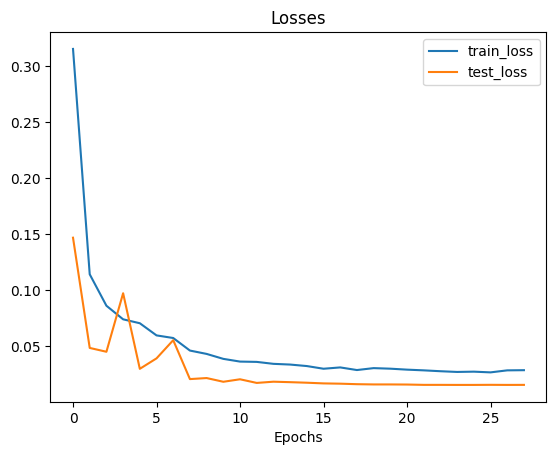

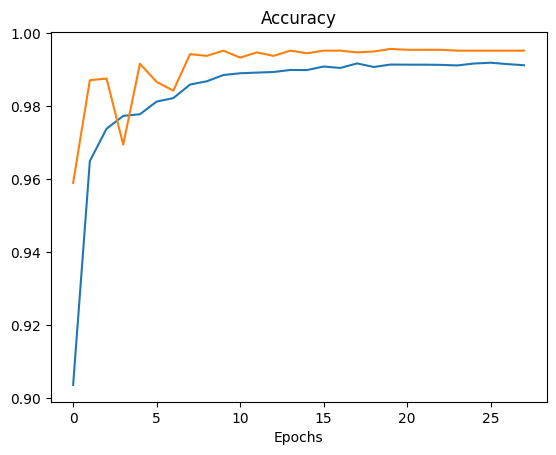

In [ ]:
plot_loss_curves(history_2)

### 5.4 Tweak the Larger CNN Model

#### 5.4.1 Build the Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers

tf.random.set_seed(42)

# create
model_3 = Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(28,28,1)),
    layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    layers.Conv2D(64, 3, padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    layers.Conv2D(128, 3, padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),


    layers.Dense(10, activation='softmax')
])

# compile
model_3.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

# get summary
model_3.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_53 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_50 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 batch_normalization_50 (Ba  (None, 14, 14, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_54 (Conv2D)          (None, 14, 14, 64)      

#### 5.4.2 Fit the Model

In [ ]:
history_3 = model_3.fit(train_data,
                  epochs=50,
                  steps_per_epoch=len(train_data),
                  validation_data=val_data,
                  validation_steps=len(val_data),
                  callbacks=[reduce_lr, early_stopping])

Epoch 1/50
591/591 [==============================] - 23s 32ms/step - loss: 0.3500 - accuracy: 0.8899 - val_loss: 0.1420 - val_accuracy: 0.9569 - lr: 0.0010
Epoch 2/50
591/591 [==============================] - 16s 28ms/step - loss: 0.1125 - accuracy: 0.9657 - val_loss: 0.0567 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 3/50
591/591 [==============================] - 17s 29ms/step - loss: 0.0809 - accuracy: 0.9747 - val_loss: 0.1049 - val_accuracy: 0.9669 - lr: 0.0010
Epoch 4/50
591/591 [==============================] - 16s 27ms/step - loss: 0.0742 - accuracy: 0.9767 - val_loss: 0.0341 - val_accuracy: 0.9888 - lr: 0.0010
Epoch 5/50
591/591 [==============================] - 17s 29ms/step - loss: 0.0613 - accuracy: 0.9817 - val_loss: 0.0249 - val_accuracy: 0.9926 - lr: 0.0010
Epoch 6/50
591/591 [==============================] - 16s 27ms/step - loss: 0.0571 - accuracy: 0.9821 - val_loss: 0.0257 - val_accuracy: 0.9926 - lr: 0.0010
Epoch 7/50
590/591 [============================>.] - ETA:

#### 5.4.3 Plot Loss Curves

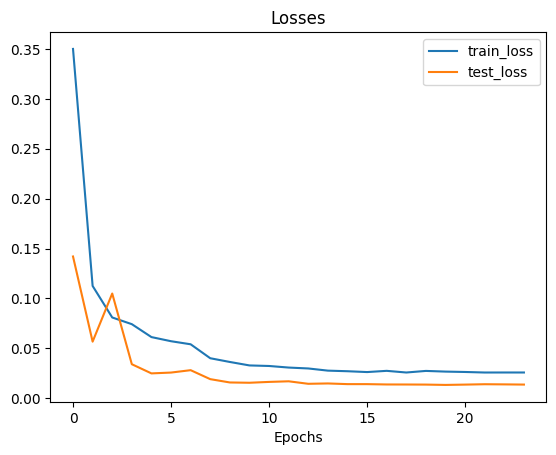

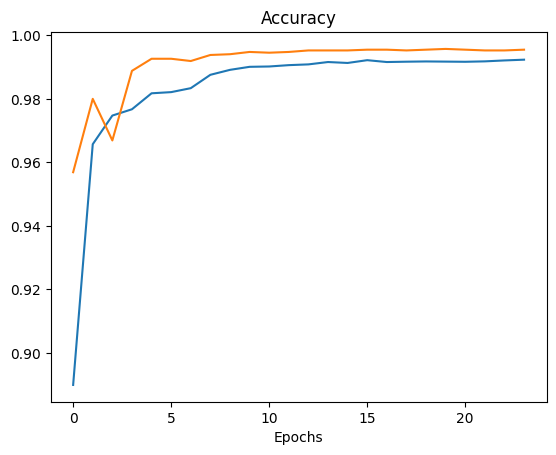

In [ ]:
plot_loss_curves(history_3)

## 6. Generate results

In [ ]:
results = model_3.predict(X_test)
results

875/875 [==============================] - 2s 2ms/step


array([[7.8847364e-09, 6.6276662e-10, 9.9999952e-01, ..., 6.4392665e-08,
        6.7159571e-09, 5.9396901e-09],
       [9.9998820e-01, 4.3731117e-08, 2.5153893e-06, ..., 6.2298210e-07,
        2.1907897e-06, 3.8387820e-06],
       [4.6984031e-08, 1.4667645e-08, 7.4361651e-07, ..., 4.0215156e-07,
        4.8291878e-07, 9.9999499e-01],
       ...,
       [1.2452051e-13, 4.7300991e-10, 5.1769432e-11, ..., 4.9709437e-10,
        1.8693387e-09, 4.5847246e-11],
       [1.1152649e-06, 5.7201413e-07, 6.0276994e-07, ..., 3.5988633e-06,
        4.7806657e-07, 9.9996138e-01],
       [8.0219209e-10, 5.6611580e-11, 9.9999917e-01, ..., 9.2331263e-09,
        2.0631069e-07, 2.5142548e-09]], dtype=float32)

In [ ]:
results = np.argmax(results, axis=1)
results

array([2, 0, 9, ..., 3, 9, 2])

In [ ]:
submission = pd.DataFrame({"ImageId": range(1, 28001), "Label": results})
submission.to_csv('digit_recognizer.csv', index=False)